# **Experiment Notebook - K-means using Elbow Method**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
# Import necessary libraries for data handling and visualization.

import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings related to future deprecations to ensure clean output.

import warnings
warnings.filterwarnings('ignore')

### 1.   Load Dataset

In [3]:
# Mount Google Drive to the current session in Google Colab.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Specify the file path for the dataset.

All_file = "/content/drive/MyDrive/MLAA/AT3/Dataset/final"

In [5]:
# store in dataframe
dfs = []

In [6]:
# read each file from  the directory
for filename in os.listdir(All_file):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame and append to the list
        df = pd.read_csv(os.path.join(All_file, filename), delimiter='|')
        dfs.append(df)

In [7]:
# Concatenate all DataFrames in the list into one DataFrame
transactions_df = pd.concat(dfs, ignore_index=True)

In [8]:
# Save the combined DataFrame to a new CSV file
transactions_df.to_csv("transactions_df.csv", index=False)

In [9]:
#Remove any unnecessary columns and handle missing
transactions_df.dropna()
transactions_df

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,1662431076,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,1665826484,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,1662292853,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,1670561624,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976


In [10]:
#Read customer file in dataframe
customers_df = pd.read_csv('/content/drive/MyDrive/MLAA/AT3/Dataset/customers.csv', delimiter='|')

In [11]:
customers_df.dropna()
customers_df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


In [12]:
#count and remove null or missing data
na_count = transactions_df.isna().sum()
print(na_count)

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64


In [13]:
#count and remove duplicates
du_count = transactions_df.duplicated().sum()
# Print the number of duplicates
print(du_count)

0


In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [15]:
#count and remove null or missing data
na_count = customers_df.isnull().sum()
print(na_count)
#print(customers_df)
#customers_df.shape

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64


In [16]:
#count and remove duplicates
cu_count = customers_df.duplicated().sum()
# Print the number of duplicates
print(cu_count)

# Remove duplicates
#customers_df = customers_df.drop_duplicates()

0


In [17]:
# Display the DataFrame
print(customers_df)

             ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         3

In [18]:
#merge Both the CSV
#merged_data = pd.merge(transactions_df, customers_df, on="acct_num")
merged_data = pd.merge(transactions_df, customers_df)
print(merged_data.columns)
merged_data.to_csv('merged_data.csv', index=False)
null_values_merged_data = merged_data.isnull().sum()
print(null_values_merged_data)

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob'],
      dtype='object')
cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
ssn           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
dtype: int64


### 2. Explore Dataset

In [19]:
merged_data.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob'],
      dtype='object')

In [20]:
me_count = merged_data.isnull().sum()
print(me_count)

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
ssn           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
dtype: int64


In [21]:
ma_count = merged_data.duplicated().sum()

In [22]:
merged_data.info

<bound method DataFrame.info of                    cc_num      acct_num                         trans_num  \
0           4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1           4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2           4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3           4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4           4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                   ...           ...                               ...   
4260899  2704390552958068  756767582811  1f091e64bd3f2382b3a4f90889329c32   
4260900  2704390552958068  756767582811  971aa63530f8f8fb1de28472e6aa53bc   
4260901  2704390552958068  756767582811  555941e364d1f591a6ae4088557f8ed3   
4260902  2704390552958068  756767582811  b756330bb5da439e28412f40e7a5f9e3   
4260903  2704390552958068  756767582811  d8b2caf59c06c36fea6980964f0a1fd6   

          unix_time        category    amt is_fraud  \
0        1558719550   gas_transport  69.12        0   
1        1569425519     grocery_pos  68.11        0   
2        1577205601        misc_net  40.35        0   
3        1571428238     grocery_pos  96.22        0   
4        1549840400   gas_transport  71.89        0   
...             ...             ...    ...      ...   
4260899  1662431076  health_fitness   8.21        0   
4260900  1665826484            home   4.79        0   
4260901  1662292853  health_fitness   1.99        0   
4260902  1670561624   personal_care   6.64        0   
4260903  1671856381          travel  12.74        0   

                            merchant  merch_lat  merch_long  ... gender  \
0                     Phillips Group  39.491416  -75.588522  ...      M   
1                         Tucker Ltd  40.890319  -75.573359  ...      M   
2                          Dixon PLC  39.244958  -74.475327  ...      M   
3                     Lambert-Cooper  39.656925  -75.802342  ...      M   
4                       Griffith LLC  40.313342  -74.220434  ...      M   
...                              ...        ...         ...  ...    ...   
4260899                Anderson-King  33.831954 -116.587500  ...      F   
4260900     Vang, Higgins and Decker  33.591525 -117.962834  ...      F   
4260901                   Ibarra LLC  34.370334 -117.628700  ...      F   
4260902  Casey, Gonzales and Mueller  33.690374 -117.301976  ...      F   
4260903                 Cruz-Johnson  34.012253 -116.333944  ...      F   

                       street      city state    zip      lat      long  \
0        863 Lawrence Valleys    Ambler    PA  19002  40.1809  -75.2156   
1        863 Lawrence Valleys    Ambler    PA  19002  40.1809  -75.2156   
2        863 Lawrence Valleys    Ambler    PA  19002  40.1809  -75.2156   
3        863 Lawrence Valleys    Ambler    PA  19002  40.1809  -75.2156   
4        863 Lawrence Valleys    Ambler    PA  19002  40.1809  -75.2156   
...                       ...       ...   ...    ...      ...       ...   
4260899    38241 Scott Harbor  Temecula    CA  92592  33.4983 -117.0958   
4260900    38241 Scott Harbor  Temecula    CA  92592  33.4983 -117.0958   
4260901    38241 Scott Harbor  Temecula    CA  92592  33.4983 -117.0958   
4260902    38241 Scott Harbor  Temecula    CA  92592  33.4983 -117.0958   
4260903    38241 Scott Harbor  Temecula    CA  92592  33.4983 -117.0958   

         city_pop                    job         dob  
0           32412  Accounting technician  1959-10-03  
1           32412  Accounting technician  1959-10-03  
2           32412  Accounting technician  1959-10-03  
3           32412  Accounting technician  1959-10-03  
4           32412  Accounting technician  1959-10-03  
...           ...                    ...         ...  
4260899    114424      Transport planner  1958-09-09  
4260900    114424      Transport planner  1958-09-09  
4260901    114424      Transport planner  1958-09-09  
4260902    114424      Transpo

In [23]:
merged_data.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,...,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03


In [24]:
merged_data.tail()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,1662431076,health_fitness,8.21,0,Anderson-King,33.831954,-116.587500,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,1665826484,home,4.79,0,"Vang, Higgins and Decker",33.591525,-117.962834,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,1662292853,health_fitness,1.99,0,Ibarra LLC,34.370334,-117.628700,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,1670561624,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690374,-117.301976,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09
4260903,2704390552958068,756767582811,d8b2caf59c06c36fea6980964f0a1fd6,1671856381,travel,12.74,0,Cruz-Johnson,34.012253,-116.333944,...,F,38241 Scott Harbor,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,1958-09-09


In [25]:
merged_data.fillna(0, inplace=True)

In [26]:
transactions_df.shape

(4260904, 10)

In [27]:
customers_df.shape

(1000, 15)

In [28]:
merged_data.shape

(4260904, 23)

### 2. Explore Variables of Interest

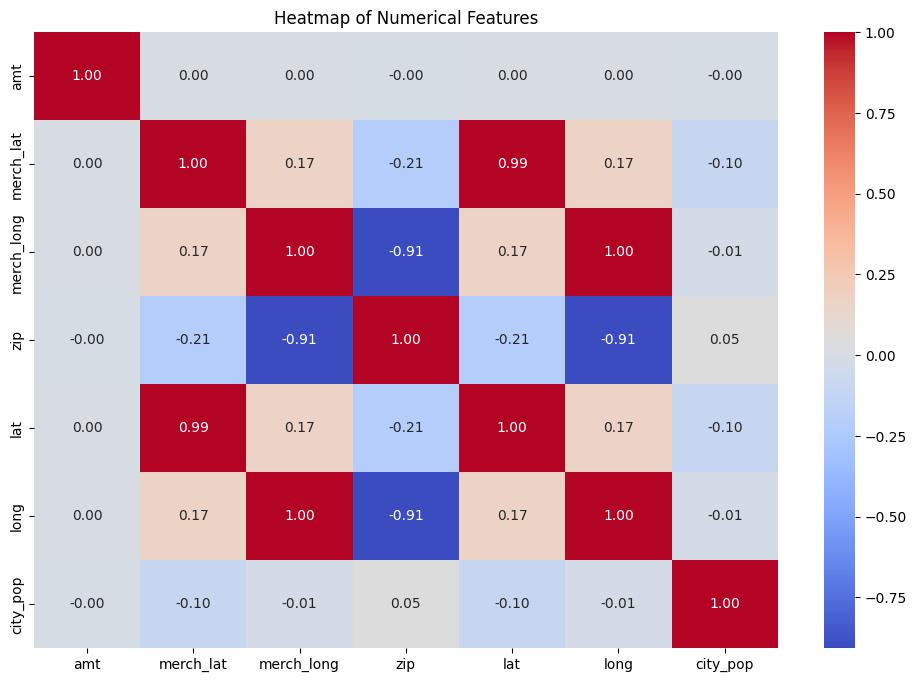

In [29]:
# Select only numerical columns for correlation analysis
numerical_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numerical Features')
plt.show()

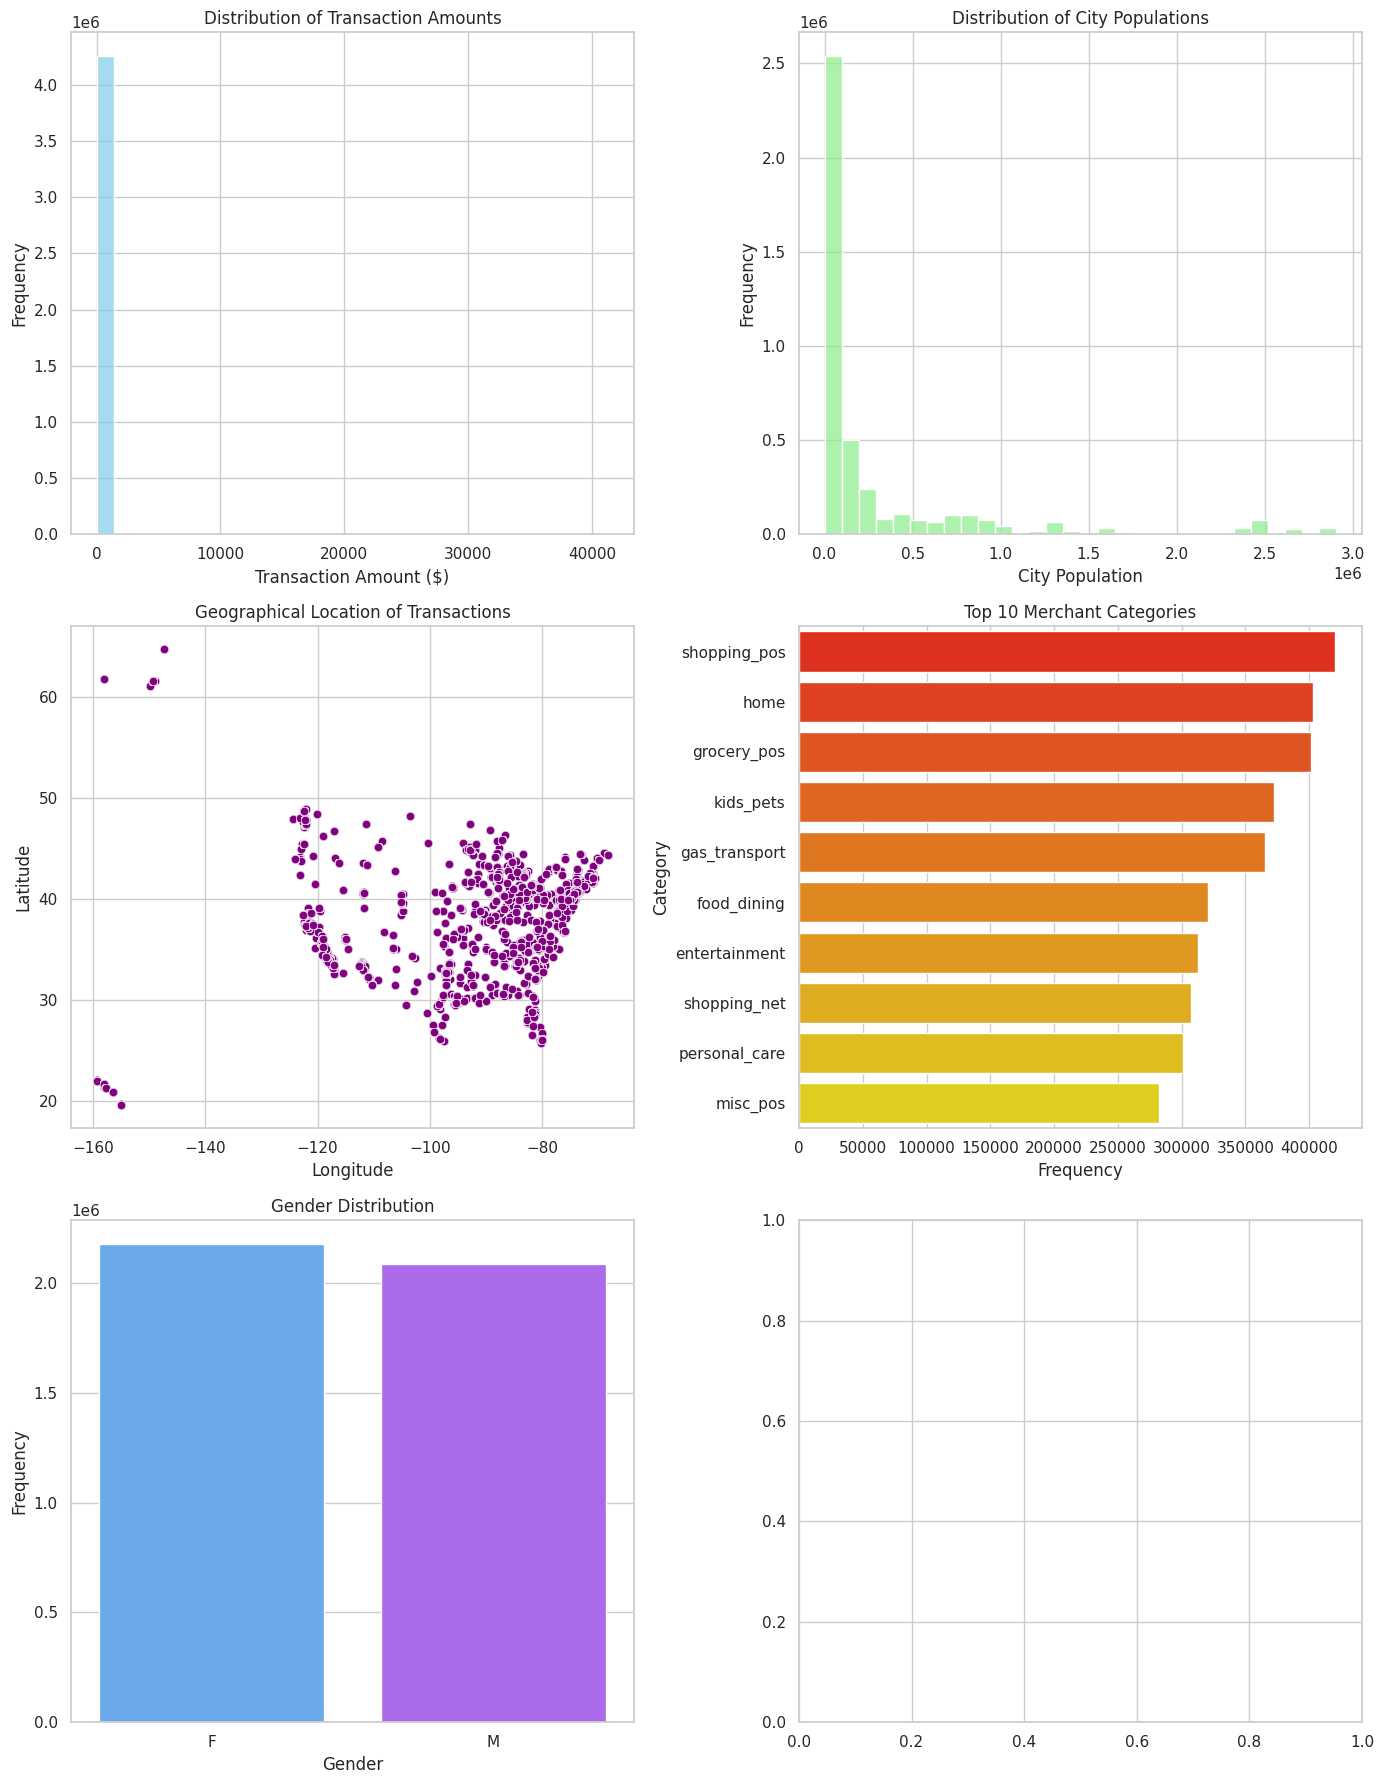

In [30]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot 1: Distribution of Transaction Amounts
sns.histplot(merged_data['amt'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Transaction Amounts')
axes[0, 0].set_xlabel('Transaction Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Distribution of City Populations
sns.histplot(merged_data['city_pop'], bins=30, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of City Populations')
axes[0, 1].set_xlabel('City Population')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Scatter plot of Geographical Locations
sns.scatterplot(x='long', y='lat', data=merged_data, ax=axes[1, 0], alpha=0.6, color='purple')
axes[1, 0].set_title('Geographical Location of Transactions')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')

# Plot 4: Bar plot of Merchant Categories
category_counts = merged_data['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, ax=axes[1, 1], palette='autumn')
axes[1, 1].set_title('Top 10 Merchant Categories')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Category')

# Plot 5: Bar plot of Gender Distribution
gender_counts = merged_data['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[2, 0], palette='cool')
axes[2, 0].set_title('Gender Distribution')
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Prepare Data

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
# Selecting the features for clustering
features = ['amt', 'city_pop', 'lat', 'long', 'category', 'city', 'state', 'gender', 'job']

In [33]:
# Separating the selected features
data_selected = merged_data[features]

In [34]:
# Defining numerical and categorical features for different preprocessing
numerical_features = ['amt', 'city_pop', 'lat', 'long']
categorical_features = ['category', 'city', 'state', 'gender', 'job']

In [35]:
# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [36]:
# Creating a column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Applying the transformations
data_preprocessed = preprocessor.fit_transform(data_selected)

In [38]:
# Checking the shape of the preprocessed data to confirm the transformation
data_preprocessed.shape

(4260904, 1302)

### 4. Train K-Means Clustering Model

In [39]:
from sklearn.cluster import KMeans

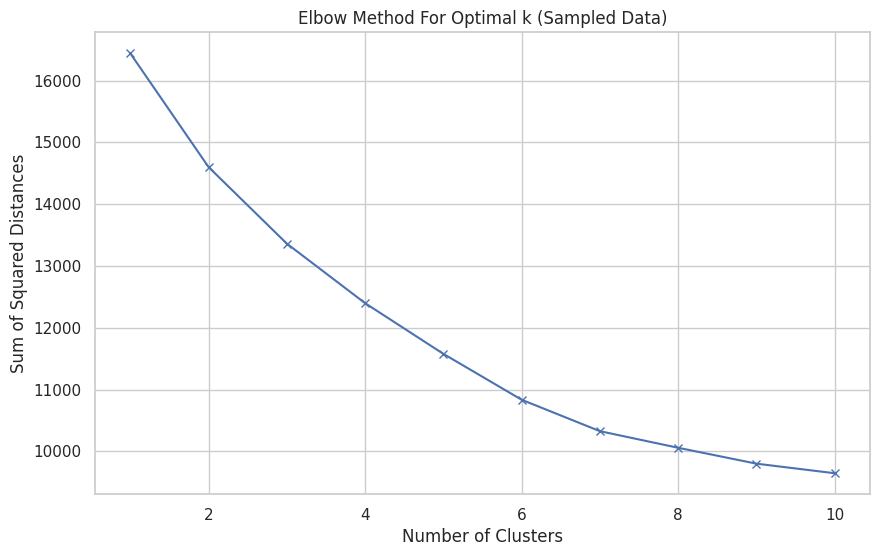

In [40]:
# Sampling a subset of the data to speed up the computation
data_sample_elbow = data_preprocessed[np.random.choice(data_preprocessed.shape[0], 2000, replace=False)]

# Recalculating the sum of squared distances for a range of cluster numbers on the sampled data
sse_sample = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_sample_elbow)
    sse_sample[k] = kmeans.inertia_

# Plotting the elbow curve for the sampled data
plt.figure(figsize=(10, 6))
plt.plot(list(sse_sample.keys()), list(sse_sample.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method For Optimal k (Sampled Data)")
plt.grid(True)
plt.show()

increasing the number of clusters beyond 4 results in diminishing returns in terms of variance explained. Therefore, k=4 would likely be the optimal choice.

In [41]:
# Initializing and fitting the K-means model
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data_preprocessed)

KMeans(n_clusters=10, random_state=0)

In [42]:
# Capturing the cluster labels for each data point
cluster_labels = kmeans.labels_

In [43]:
# Adding the cluster labels to the original data for analysis
merged_data['cluster'] = cluster_labels

In [44]:
# Display the first few rows with cluster labels
merged_data[['amt', 'city_pop', 'lat', 'long', 'category', 'city', 'state', 'gender', 'job', 'cluster']].head()

,amt,city_pop,lat,long,category,city,state,gender,job,cluster
0,69.12,32412,40.1809,-75.2156,gas_transport,Ambler,PA,M,Accounting technician,3
1,68.11,32412,40.1809,-75.2156,grocery_pos,Ambler,PA,M,Accounting technician,3
2,40.35,32412,40.1809,-75.2156,misc_net,Ambler,PA,M,Accounting technician,3
3,96.22,32412,40.1809,-75.2156,grocery_pos,Ambler,PA,M,Accounting technician,3
4,71.89,32412,40.1809,-75.2156,gas_transport,Ambler,PA,M,Accounting technician,3


In [45]:
# List of selected features for plotting
feat_list = ['amt', 'city_pop', 'lat', 'long']

In [46]:
# Create a list of all pairs of features
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

pairs

[('amt', 'city_pop'),
 ('amt', 'lat'),
 ('amt', 'long'),
 ('city_pop', 'lat'),
 ('city_pop', 'long'),
 ('lat', 'long')]

In [47]:
sampled_data = merged_data.sample(n=10000, random_state=1)

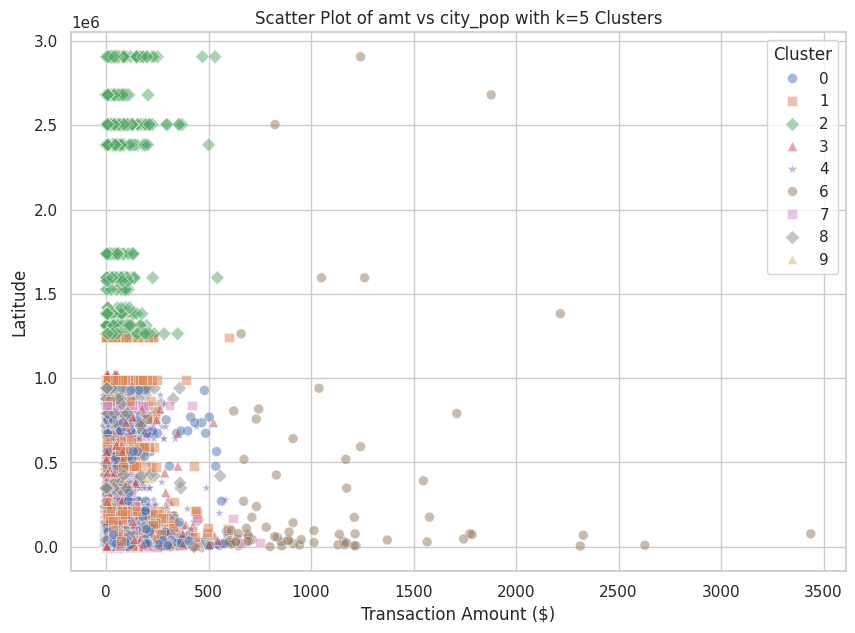

In [48]:
# Selecting features and setting the dataset
x_feature = 'amt'
y_feature = 'city_pop'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

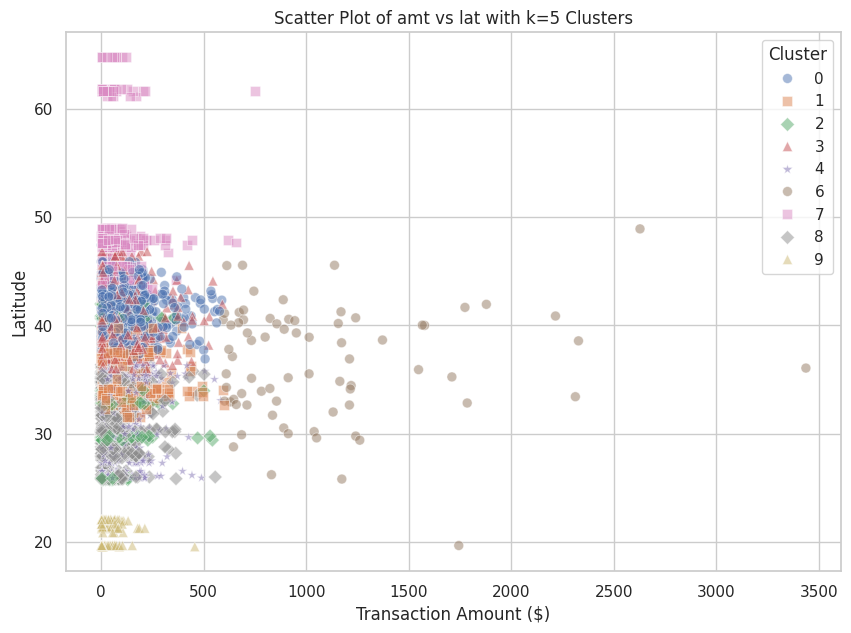

In [49]:
# Selecting features and setting the dataset
x_feature = 'amt'
y_feature = 'lat'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

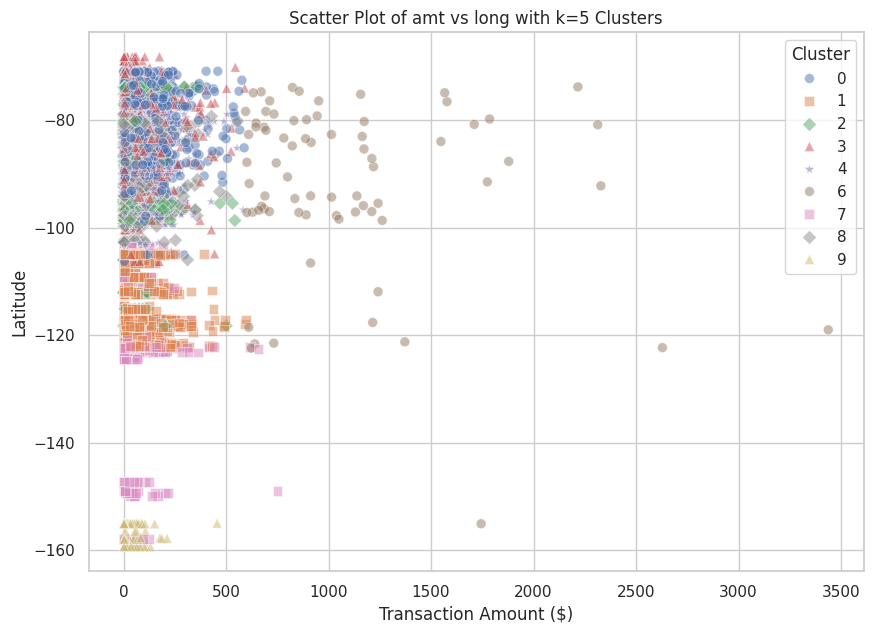

In [50]:
# Selecting features and setting the dataset
x_feature = 'amt'
y_feature = 'long'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

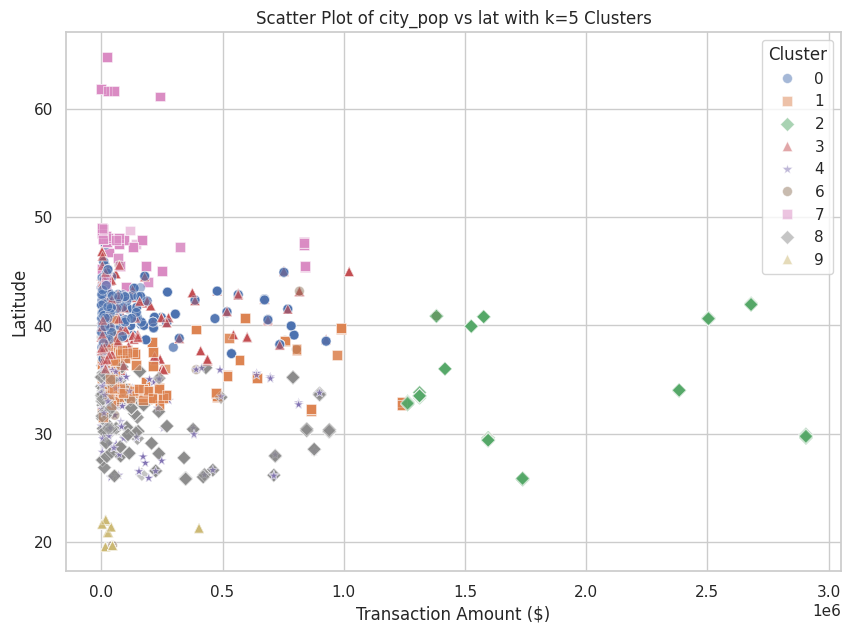

In [51]:
# Selecting features and setting the dataset
x_feature = 'city_pop'
y_feature = 'lat'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

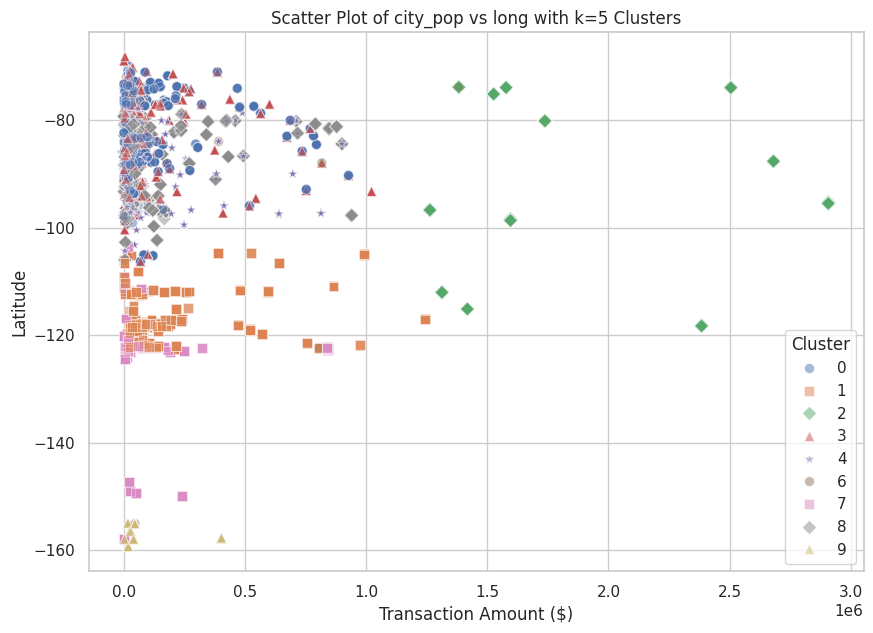

In [52]:
# Selecting features and setting the dataset
x_feature = 'city_pop'
y_feature = 'long'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

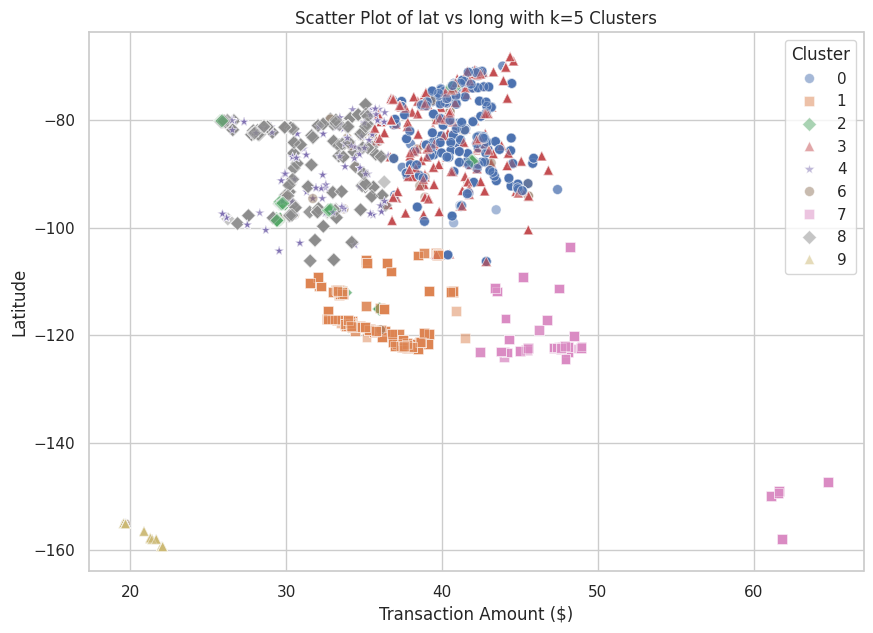

In [53]:
# Selecting features and setting the dataset
x_feature = 'lat'
y_feature = 'long'
clusters = 'cluster'  # Assuming the cluster labels are in this column

# Creating the scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=x_feature, y=y_feature, data=sampled_data,
    hue=clusters, style=clusters, palette='deep', s=50, alpha=0.5,
    markers=['o', 's', 'D', '^', '*'])

# Adding plot titles and labels
plt.title(f'Scatter Plot of {x_feature} vs {y_feature} with k=5 Clusters')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [54]:
# Calculating the mean of selected features and the cluster label
cluster_averages = merged_data[feat_list + ['cluster']].groupby('cluster').mean()

cluster_averages

,amt,city_pop,lat,long
cluster,,,,
0,67.984726,1.192916e+05,41.032842,-81.840500
1,59.966116,2.477723e+05,35.497821,-116.377544
2,57.866124,2.059286e+06,35.472339,-91.632845
3,52.693499,1.215915e+05,40.490014,-82.472804
4,68.165225,1.752618e+05,32.181692,-87.933348
5,6972.176124,3.457401e+05,36.830413,-93.830589
6,1073.881539,2.722874e+05,37.410208,-91.687986
7,62.900783,2.367377e+05,48.031737,-124.010470
8,51.577261,2.147135e+05,31.817733,-88.525914
